# 1. Import dataset and split into Attributes and Target

In [2]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Load the input dataset
df = pd.read_csv('dataset_best_2862_3000.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652,95.002971,342232.0,440929.412497,0.265669,...,17.570580,2988.845784,0.000048,0.0,0.203240,0.689348,0.247897,0.177179,0.129331,1
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749,706.110944,367563.0,440929.412497,0.389225,...,26.808339,2999.698390,0.000055,0.0,0.454996,0.825949,0.244089,0.157520,0.128098,0
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452,90.062284,372673.0,440929.412497,0.412014,...,28.569677,3089.038330,0.000066,0.0,0.113644,0.639707,0.245816,0.145467,0.112630,1
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961,92.624826,356327.0,440929.412497,0.054575,...,2.635613,2909.707990,0.000021,0.0,0.195025,0.840115,0.242933,0.232125,0.132789,0
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071,95.007263,330987.0,440929.412497,0.307098,...,16.582476,3060.614655,0.000052,0.0,0.201166,0.795364,0.257988,0.181468,0.129279,1
5,0.568655,0.622806,2.208519,0.171678,0.212573,0.082090,521.839272,378544.0,440929.412497,0.161052,...,4.773577,3068.697142,0.000037,0.0,0.512149,0.953839,0.250370,0.221810,0.131097,0
6,1.098779,0.308377,1.418885,0.118913,0.256489,0.006151,88.818971,408904.0,440929.412497,0.248101,...,10.901041,3077.622804,0.000037,0.0,0.145490,0.592008,0.232589,0.213308,0.120157,0
7,1.276510,0.271858,2.517624,0.012513,0.185300,0.725843,84.149104,258290.0,440929.412497,0.010813,...,0.007914,2980.014736,0.000023,0.0,0.033354,0.886180,0.258284,0.244838,0.134437,1
8,0.740493,0.813414,1.305634,0.400257,0.244999,0.101254,97.173299,369413.0,440929.412497,0.347698,...,22.370092,3076.435974,0.000058,0.0,0.322633,0.915669,0.243088,0.160626,0.121624,0
9,1.051327,0.673208,2.430025,0.397162,0.165809,0.538571,91.493834,283032.0,440929.412497,0.276499,...,12.355590,3040.427547,0.000051,0.0,0.096260,0.841697,0.259230,0.198282,0.131534,1


In [3]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [4]:
df.shape

(2861, 27)

In [5]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

(2655, 27)

In [6]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]', 'CurtailmentToRESGeneration_[%]']]
y_curtail = Dataset['CurtailmentToRESGeneration_[%]']
#y_shed = Dataset['Shedding_[MWh]']
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
X

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071
...,...,...,...,...,...,...
2855,0.906998,0.492762,1.301774,0.452141,0.024645,0.671601
2856,1.278408,0.728338,0.996340,0.085810,0.300380,0.504999
2857,0.979262,0.598873,1.599528,0.361362,0.046153,0.367896
2858,0.667955,0.461980,0.479170,0.127817,0.105495,0.565414


In [7]:
# Check for missing data in the target
nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [8]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio                    -0.088117
ShareFlex                        -0.057562
ShareStorage                     -0.069412
ShareWind                         0.821606
SharePV                           0.285197
rNTC                             -0.257180
Curtailment_[TWh]                 1.000000
Shedding_[MWh]                    0.132845
CurtailmentToRESGeneration_[%]    0.962907
Name: Curtailment_[TWh], dtype: float64


In [9]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio                    -0.402016
ShareFlex                        -0.017249
ShareStorage                     -0.042498
ShareWind                         0.140299
SharePV                          -0.061406
rNTC                             -0.204496
Curtailment_[TWh]                 0.132845
Shedding_[MWh]                    1.000000
CurtailmentToRESGeneration_[%]    0.180134
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : Curtailement

In [10]:
print(X.shape)
print(y_curtail.shape)
print(type(X))
print(type(y_curtail))

(2655, 6)
(2655,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_curtail, test_size=0.3,random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
#print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 1858
Taille de l'ensemble de test         : 797


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
#X_val_sc = scaler_X.transform(X_val)


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
#y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [15]:
type(y_train_scaled)
print(y_train_scaled)

[0.17360499 0.44251402 0.56970923 ... 0.28468077 0.01303583 0.38496969]


# 3. Model Building - CURTAILMENT

In [16]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

num_folds = 10
error_metrics = {'neg_mean_absolute_error','neg_root_mean_squared_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor())}
my_cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
# RFR : 
"""
modelo = RandomForestRegressor(random_state=42)
scoring='neg_mean_absolute_error'
params = {
    # Number of trees in random forest
    'n_estimators': [500],  # default=100
     # Maximum number of levels in tree
    'max_depth': [None, 5,10],  #deafult = None
     # The minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf' : [1, 2, 4],
    # The number of features to consider when looking for the best split
    'max_features' : [None, "sqrt", "log2"],
    # Whether bootstrap samples are used when building trees
    'bootstrap' : [True, False]
}


# Search for the best combination of hyperparameters
grid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)
grid_search_rf.fit(X_train_sc, y_train_scaled)

best_rf = grid_search_rf.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']
"""

'\nmodelo = RandomForestRegressor(random_state=42)\nscoring=\'neg_mean_absolute_error\'\nparams = {\n    # Number of trees in random forest\n    \'n_estimators\': [500],  # default=100\n     # Maximum number of levels in tree\n    \'max_depth\': [None, 5,10],  #deafult = None\n     # The minimum number of samples required to split an internal node\n    \'min_samples_split\': [2, 5, 10],\n    # The minimum number of samples required to be at a leaf node\n    \'min_samples_leaf\' : [1, 2, 4],\n    # The number of features to consider when looking for the best split\n    \'max_features\' : [None, "sqrt", "log2"],\n    # Whether bootstrap samples are used when building trees\n    \'bootstrap\' : [True, False]\n}\n\n\n# Search for the best combination of hyperparameters\ngrid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)\ngrid_search_rf.fit(X_train_sc, y_train_scaled)\n\nbest_rf = grid_search_rf.best_estimator_\n\n# Print best Result\npr

In [18]:
%%time

modelo = RandomForestRegressor(random_state=42)
scoring='neg_mean_absolute_error'
params = {
    # Number of trees in random forest
    'n_estimators': [500],  # default=100
     # Maximum number of levels in tree
    'max_depth': [None],  #deafult = None
     # The minimum number of samples required to split an internal node
    'min_samples_split': [2],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf' : [1],
    # The number of features to consider when looking for the best split
    'max_features' : [None],
    # Whether bootstrap samples are used when building trees
    'bootstrap' : [True]
}


# Search for the best combination of hyperparameters
grid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)

start_time = time.time()

grid_search_rf.fit(X_train_sc, y_train_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

best_rf = grid_search_rf.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']

Temps d'exécution : 56.3847 secondes
Best result: -0.022904 using the following hyperparameters {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
CPU times: total: 14 s
Wall time: 56.4 s


In [19]:
# MLP : 
"""
modelo = MLPRegressor(random_state=42)
#scoring='mean_absolute_error'
param_grid_mlp = {
    'hidden_layer_sizes': [(128, 64, 32, 16), (100,50), (50, 30, 10)],            #[(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)
grid_search_mlp.fit(X_train_sc, y_train_scaled)

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']
"""

'\nmodelo = MLPRegressor(random_state=42)\n#scoring=\'mean_absolute_error\'\nparam_grid_mlp = {\n    \'hidden_layer_sizes\': [(128, 64, 32, 16), (100,50), (50, 30, 10)],            #[(50,), (100,), (50, 50), (100, 50)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'adam\', \'sgd\'],\n    \'alpha\': [0.0001, 0.001, 0.01],\n    \'learning_rate\': [\'constant\', \'adaptive\']\n}\n\n# Search for the best combination of hyperparameters\ngrid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)\ngrid_search_mlp.fit(X_train_sc, y_train_scaled)\n\nbest_mlp = grid_search_mlp.best_estimator_\n\n# Print best Result\nprint("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))\nmeans = grid_search_mlp.cv_results_[\'mean_test_score\']\nstds = grid_search_mlp.cv_results_[\'std_test_score\']\nparams = grid_search_mlp.cv_results_[\'params\']\n'

In [20]:
%%time

modelo = MLPRegressor(max_iter=50, random_state=42)

param_grid_mlp = {
    'hidden_layer_sizes': [(100,50)],           
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)

start_time = time.time()

grid_search_mlp.fit(X_train_sc, y_train_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']

Temps d'exécution : 3.5778 secondes
Best result: -0.020200 using the following hyperparameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
CPU times: total: 2.41 s
Wall time: 3.58 s


Evaluation metric:  neg_mean_absolute_error
Model  RandomForest
Model  MLPRegressor
[('RandomForest', -0.022904196807752457, 0.001676722991734247), ('MLPRegressor', -0.020199994959106012, 0.0017149077968095909)]


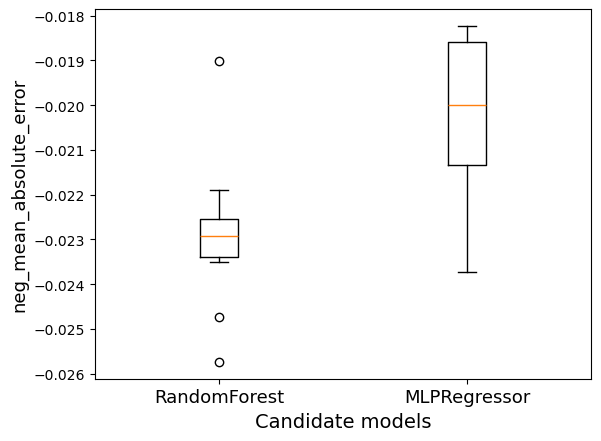

Evaluation metric:  neg_root_mean_squared_error
Model  RandomForest
Model  MLPRegressor
[('RandomForest', -0.036281503113547754, 0.008268188868509994), ('MLPRegressor', -0.03101878857742151, 0.009237697157075984)]


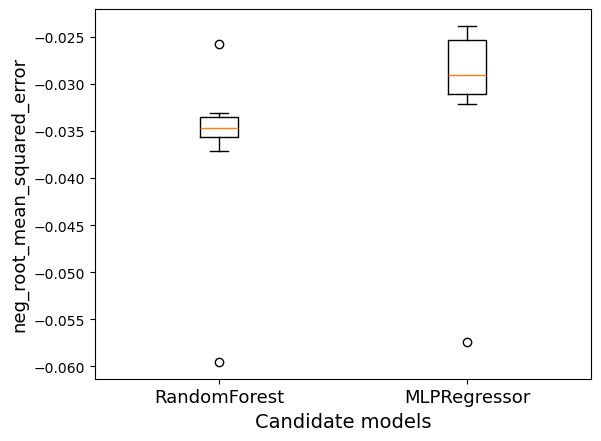

Evaluation metric:  r2
Model  RandomForest
Model  MLPRegressor
[('RandomForest', 0.9737696688959236, 0.015558379865449674), ('MLPRegressor', 0.9799719187084996, 0.015891652849068273)]


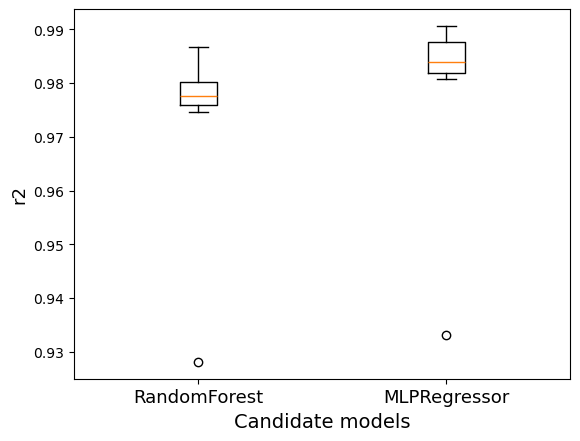

In [21]:
# Comparing two models
models = [('RandomForest', best_rf), ('MLPRegressor', best_mlp)]
error_metrics = [('neg_mean_absolute_error', 'Mean absolute error (MAE)'), ('neg_root_mean_squared_error', 'Root mean square error (RMSE)'), ('r2', 'R2 score')]
num_folds = 10

for scoring, i in error_metrics:
    results = []  # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cv_results = cross_val_score(model, X_train_sc, y_train_scaled, cv=my_cv, scoring=scoring, n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    #fig.suptitle('Compare metric result for algorithms: %s' % scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models', fontsize=14)
    ax.set_ylabel('%s' % scoring, fontsize=13)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=13)
    plt.savefig(f'{scoring}_Comparison')
    plt.show()

    results = []

# 4. Results

This part contains:

- The evaluation on test fold
- The learning curve
- Different plots
- Surface plots of the surrogate model
- Surface plots by going out of the range of definition of the regression

In [22]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# 6. Final evaluation on the test set RF
final_model_rf = best_rf 

start_time = time.time()

test_pred_RF = final_model_rf.predict(X_test_sc)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

test_r2 = r2_score(y_test_scaled, test_pred_RF)
test_rmse = root_mean_squared_error(y_test_scaled, test_pred_RF)
test_mae = mean_absolute_error(y_test_scaled, test_pred_RF)
print(f'Final model test root_mean_squared_error : {test_rmse}')
print(f'Final model test r2 score : {test_r2}')
print(f'Final model test mean_absolute_error : {test_mae}')

Temps d'exécution : 0.2266 secondes
Final model test root_mean_squared_error : 0.03456923865865936
Final model test r2 score : 0.9786166609332296
Final model test mean_absolute_error : 0.02350588984131097


In [23]:
# 6. Final evaluation on the test set MLP
final_model_mlp = best_mlp 

start_time = time.time()

test_pred_MLP = final_model_mlp.predict(X_test_sc)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

test_r2 = r2_score(y_test_scaled, test_pred_MLP)
test_rmse = root_mean_squared_error(y_test_scaled, test_pred_MLP)
test_mae = mean_absolute_error(y_test_scaled, test_pred_MLP)
print(f'Final model test root_mean_squared_error : {test_rmse}')
print(f'Final model test r2 score : {test_r2}')
print(f'Final model test mean_absolute_error : {test_mae}')

Temps d'exécution : 0.0319 secondes
Final model test root_mean_squared_error : 0.0290742422095415
Final model test r2 score : 0.9848743968769237
Final model test mean_absolute_error : 0.020939539142670004


<function matplotlib.pyplot.show(close=None, block=None)>

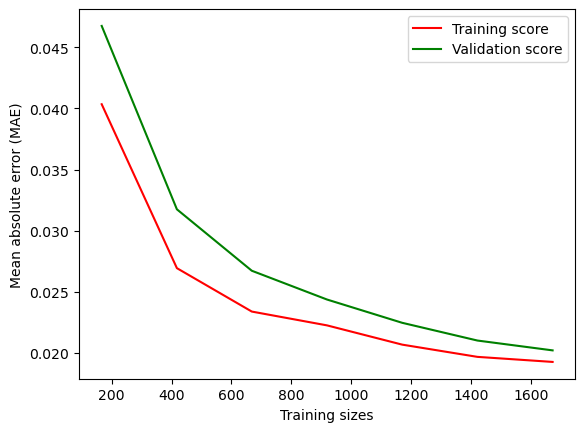

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train_sc, y_train_scaled, cv=my_cv, scoring= 'neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 7))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = -np.std(val_scores, axis=1)


plt.figure()
plt.xlabel( 'Training sizes')
plt.ylabel( 'Mean absolute error (MAE)' )
plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, color="g", label="Validation score")
plt.legend(loc="best")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

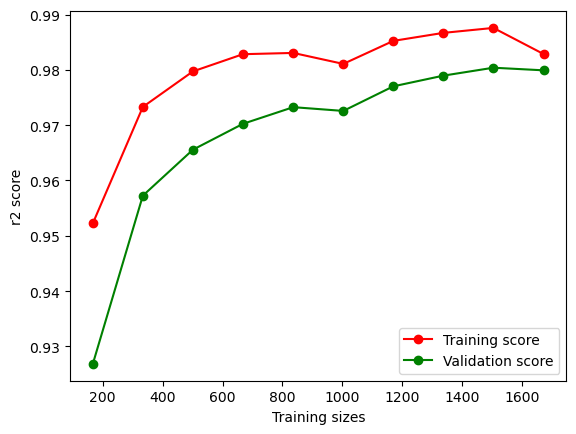

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train_sc, y_train_scaled, cv=my_cv, scoring= 'r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


plt.figure()
plt.xlabel( 'Training sizes')
plt.ylabel( 'r2 score' )
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.legend(loc="best")
plt.show

In [26]:
y_predict_curtail_rf_test_rescaled = scaler_y.inverse_transform(test_pred_RF.reshape(-1, 1)).ravel()
y_predict_curtail_MLP_test_rescaled = scaler_y.inverse_transform(test_pred_MLP.reshape(-1, 1)).ravel()
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

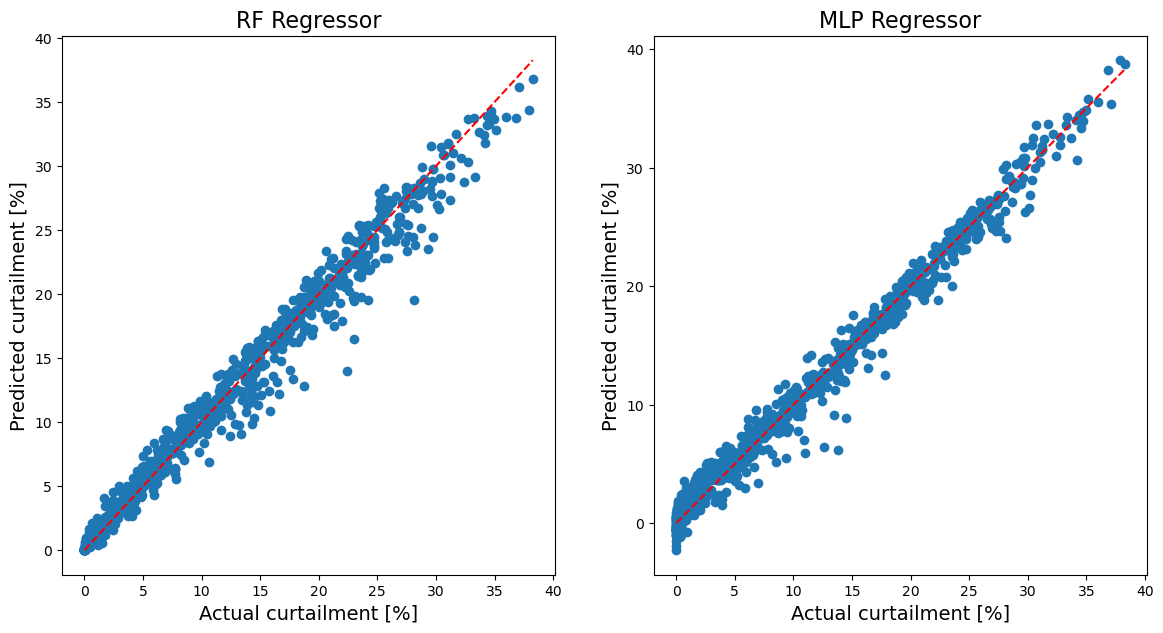

In [27]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_rescaled, y_predict_curtail_rf_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual curtailment [%]', fontsize=14)
plt.ylabel('Predicted curtailment [%]', fontsize=14)
plt.title('RF Regressor', fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_predict_curtail_MLP_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual curtailment [%]', fontsize=14)
plt.ylabel('Predicted curtailment [%]' , fontsize=14)
plt.title('MLP Regressor', fontsize=16)

plt.show()

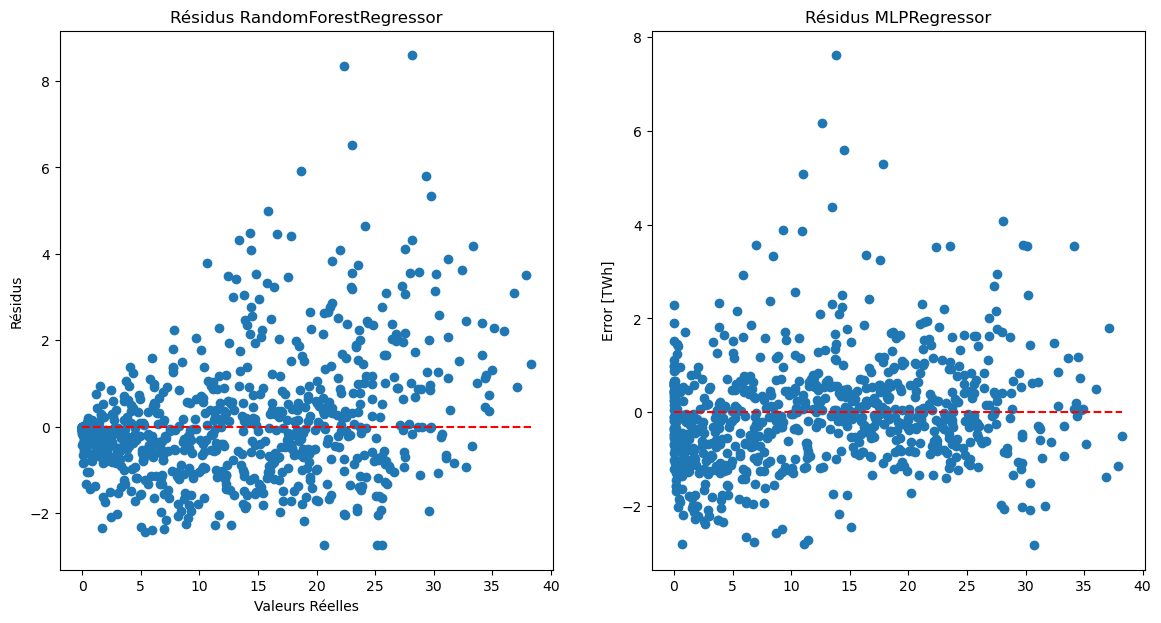

In [28]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
residuals_rf = y_test_rescaled - y_predict_curtail_rf_test_rescaled
plt.scatter(y_test_rescaled, residuals_rf)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus RandomForestRegressor')

plt.subplot(1, 2, 2)
residuals_mlp = y_test_rescaled - y_predict_curtail_MLP_test_rescaled
plt.scatter(y_test_rescaled, residuals_mlp)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel(' ')
plt.ylabel('Error [TWh]')
plt.title('Résidus MLPRegressor')

plt.show()

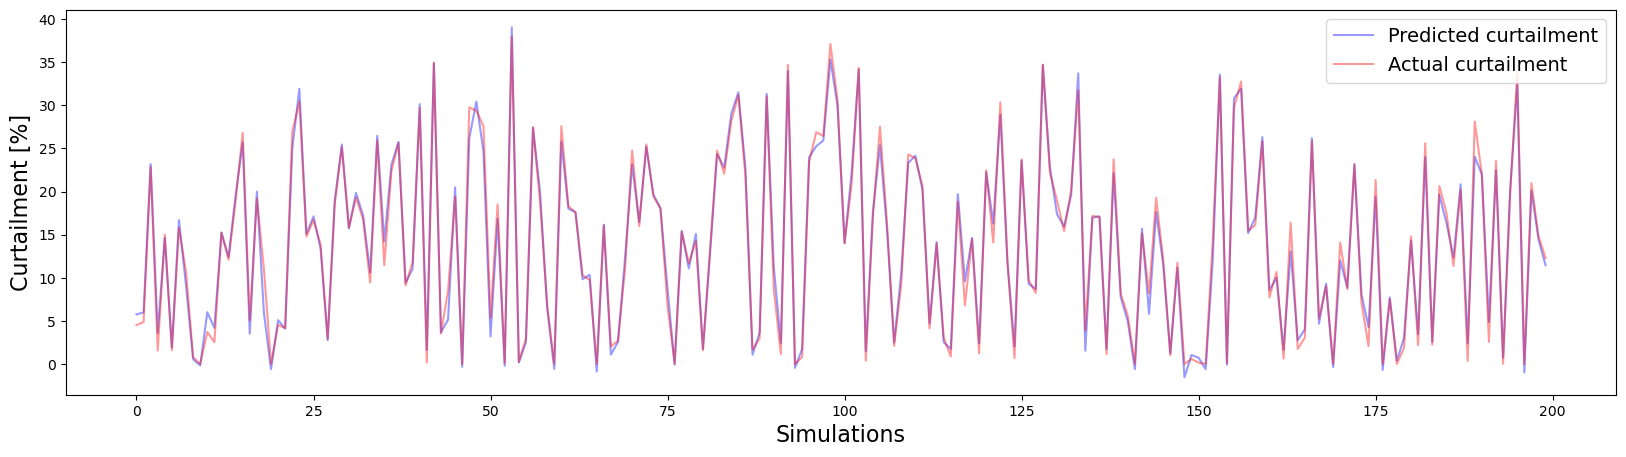

In [29]:
import matplotlib.pyplot as plt


num_values_to_plot = 200


x = range(num_values_to_plot)
y_predict_curtail_MLP_test_rescaled_limited = y_predict_curtail_MLP_test_rescaled[:num_values_to_plot]
y_test_rescaled_limited = y_test_rescaled[:num_values_to_plot]


plt.figure(figsize=(20, 5))
plt.xlabel('Simulations', fontsize=16)
plt.ylabel('Curtailment [%]', fontsize=16)
plt.plot(x, y_predict_curtail_MLP_test_rescaled_limited, alpha=0.4, color='blue', label='Predicted curtailment')
plt.plot(x, y_test_rescaled_limited, alpha=0.4, color='red', label='Actual curtailment')
plt.legend(loc='upper right', fontsize=14)
plt.show()

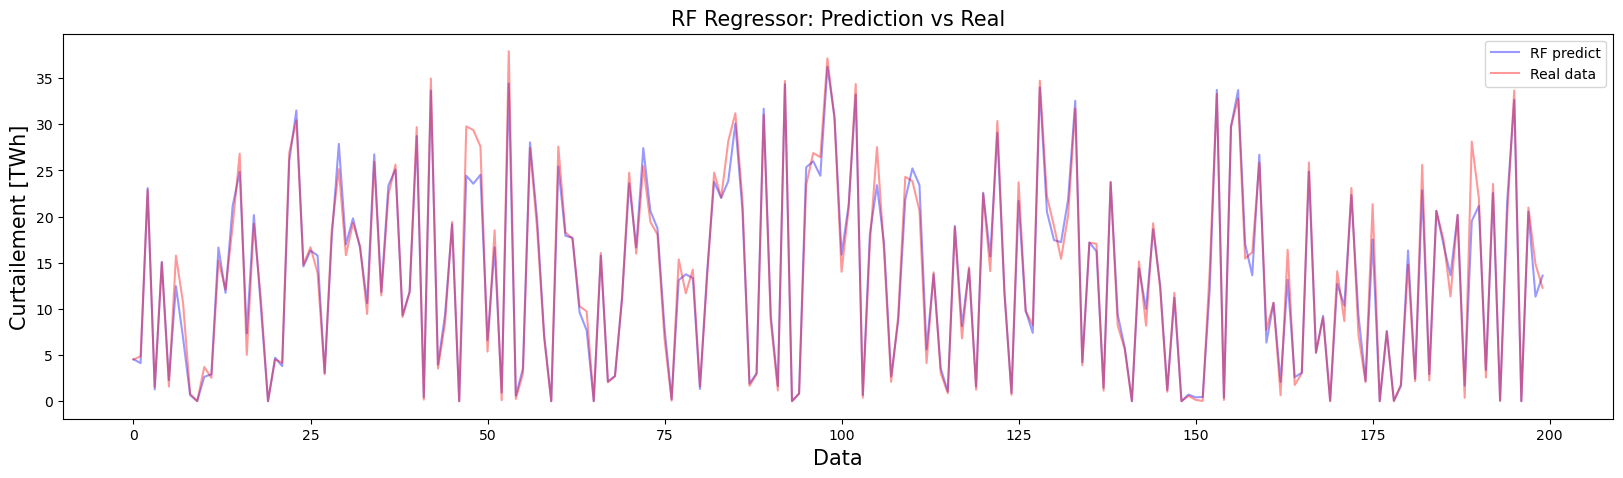

In [30]:
import matplotlib.pyplot as plt


num_values_to_plot = 200


x = range(num_values_to_plot)
y_predict_curtail_rf_test_rescaled_limited = y_predict_curtail_rf_test_rescaled[:num_values_to_plot]
y_test_rescaled_limited = y_test_rescaled[:num_values_to_plot]


plt.figure(figsize=(20, 5))
plt.xlabel('Data', fontsize=15)
plt.ylabel('Curtailement [TWh]', fontsize=15)
plt.plot(x, y_predict_curtail_rf_test_rescaled_limited, alpha=0.4, color='blue', label='RF predict')
plt.plot(x, y_test_rescaled_limited, alpha=0.4, color='red', label='Real data')
plt.title('RF Regressor: Prediction vs Real', fontsize=15)
plt.legend()
plt.show()

### TEST ZONE

C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\romai\anaco

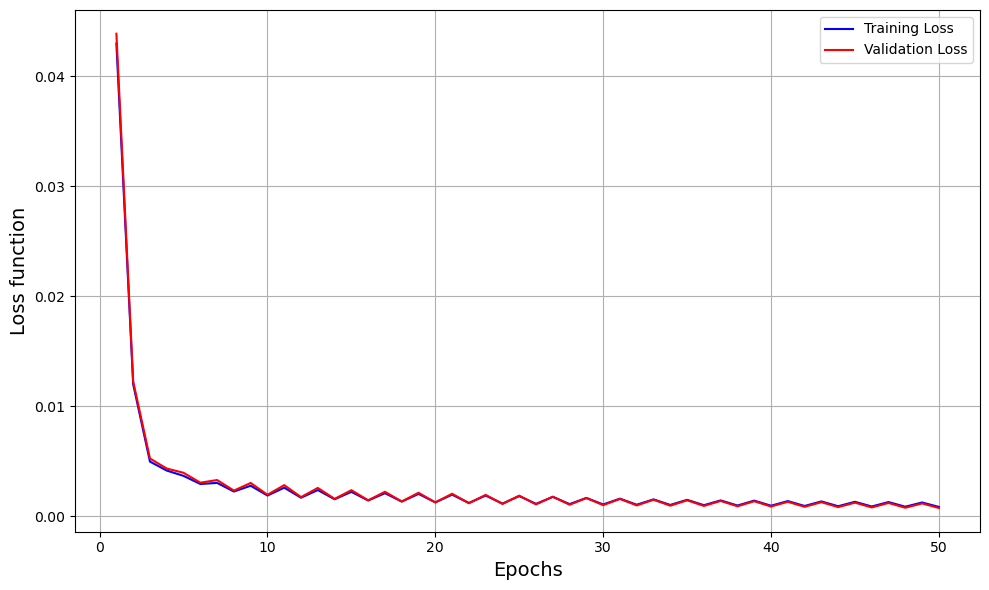

In [33]:
#TEST ZONE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mlp2 = MLPRegressor(**grid_search_mlp.best_params_, max_iter=1, warm_start=True, random_state=42)


num_epochs = 50


train_loss_list = []
val_loss_list = []


for epoch in range(num_epochs):
    mlp2.fit(X_train_sc, y_train_scaled) 

    y_train_pred = mlp2.predict(X_train_sc)
    train_loss = mean_squared_error(y_train_scaled, y_train_pred)
    train_loss_list.append(train_loss)
    
    y_test_pred = mlp2.predict(X_test_sc)
    test_loss = mean_squared_error(y_test_scaled, y_test_pred)
    val_loss_list.append(test_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_loss_list, linestyle='-', color='b', label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_list, linestyle='-', color='r', label='Validation Loss')
#plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss function', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Feature ranking:
1. Feature 'Share Wind' (0.7787)
2. Feature 'rNTC' (0.1345)
3. Feature 'Share PV' (0.0580)
4. Feature 'Share Storage' (0.0181)
5. Feature 'Share Flex.' (0.0055)
6. Feature 'CR' (0.0052)


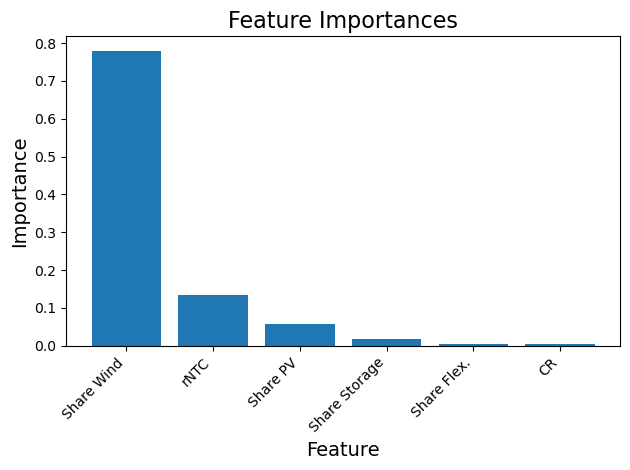

In [99]:
# Get feature importances
feature_names = ['CR', 'Share Flex.', 'Share Storage', 'Share Wind', 'Share PV', 'rNTC']
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get feature indices
indices = np.argsort(importances)[::-1]

# Print feature ranking with descriptive names
print("Feature ranking:")
for f in range(X_train_sc.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure()
plt.title("Feature Importances",fontsize=16)
plt.bar(range(X_train_sc.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_sc.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("FeatureS", fontsize=14)
plt.ylabel("Importance",fontsize=14)
plt.tight_layout()  # Adjust layout to make room for feature names
plt.show()

In [62]:
print(type(X_test_sc))

<class 'numpy.ndarray'>


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x1_values = np.linspace(0, 1, 15) 
x2_values = np.linspace(0, 1, 15)  
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)


x1 = np.linspace(0.3, 1.3, 15) 
x2 = np.linspace(0.25, 1.0, 15)  
x3 = np.linspace(0, 3.00, 15)  
x4 = np.linspace(0, 0.55, 15)  
x5 = np.linspace(0, 0.35, 15)  
x6 = np.linspace(0, 0.75, 15)  


valeurs_scaled = scaler_X.transform(np.array([1.16, 0.42, 0.001, 0.2, 0.05, 0.28]).reshape(1, -1))

static_values = np.full(225, 0.5)  
CR_static = np.full(225, valeurs_scaled[0, 0])
flex_static = np.full(225, valeurs_scaled[0, 1])
sto_static = np.full(225, valeurs_scaled[0, 2])
wind_static = np.full(225, valeurs_scaled[0, 3])
PV_static = np.full(225, valeurs_scaled[0, 4])
NTC_static = np.full(225, valeurs_scaled[0, 5])


print(valeurs_scaled)


[[ 0.84446944  0.26111456 -0.00008962  0.36329542  0.14229088  0.37314701]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


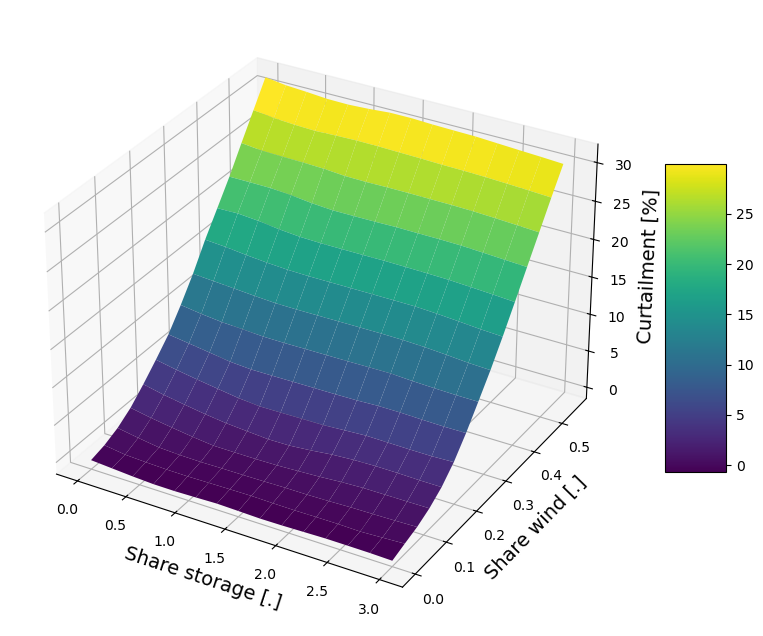

In [64]:
# sto wind
input_data = np.column_stack((CR_static, flex_static, x1_mesh.flatten(), x2_mesh.flatten(), PV_static , NTC_static))


predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)


fig = plt.figure(figsize=(10, 8))
A, B = np.meshgrid(x3, x4)

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Share storage [.]', fontsize=14)
ax1.set_ylabel('Share wind [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

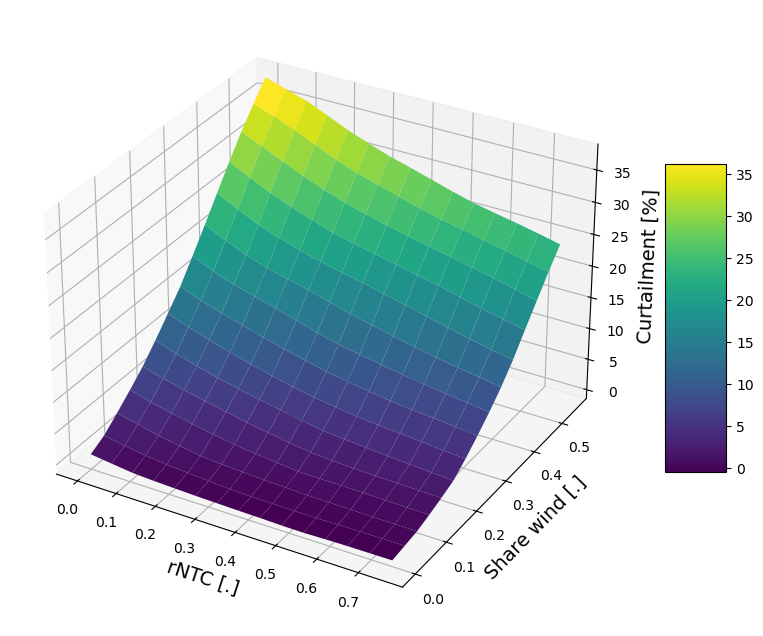

In [65]:
# NTC-Wind
input_data = np.column_stack((CR_static, flex_static, sto_static, x2_mesh.flatten(), PV_static, x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x6, x4)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A,B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share wind [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

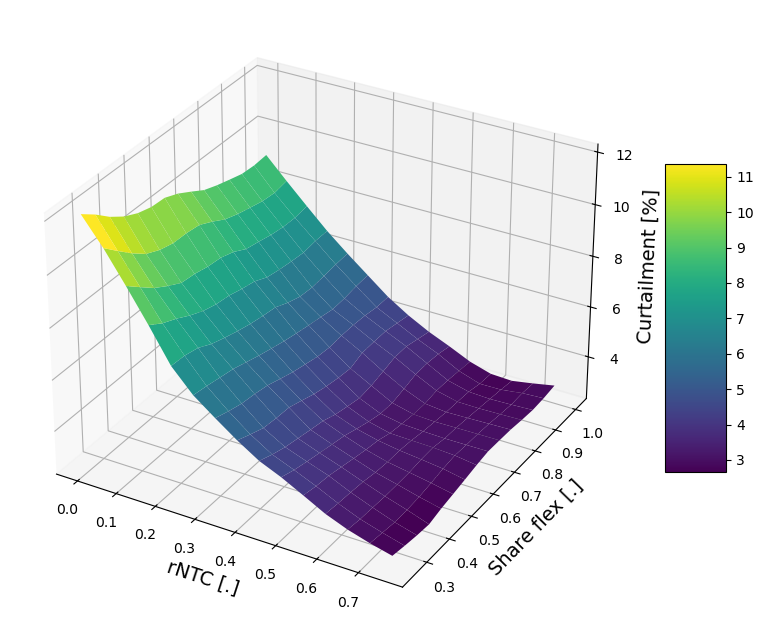

In [66]:
# Flex-rNTC 
input_data = np.column_stack((CR_static, x2_mesh.flatten(), sto_static, wind_static, PV_static , x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x6, x2)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share flex [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

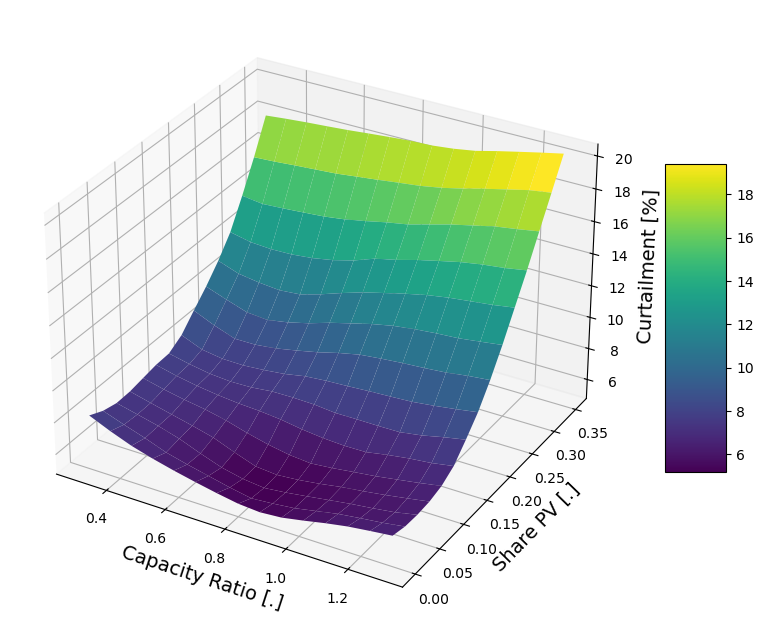

In [67]:
# CR-PV 
input_data = np.column_stack((x1_mesh.flatten(), flex_static, sto_static , wind_static, x2_mesh.flatten() , NTC_static ))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x5)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('Share PV [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

In [68]:
bounds_basic = [[0.1, 0.1, 0.0, 0.0, 0.0, 0.0],[2, 0.99, 6, 1.10, 0.7, 1.5]]
Bounds_info = scaler_X.transform(bounds_basic)
np.set_printoptions(suppress=True)
print(np.round(Bounds_info, 3)) 

[[-0.334 -0.232 -0.    -0.001 -0.001 -0.   ]
 [ 1.778  1.139  2.001  2.001  2.001  2.001]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [69]:
# Going out of the range 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x1v = np.linspace(Bounds_info[0,0], Bounds_info[1,0], 15) 
x2v = np.linspace(Bounds_info[0,1], Bounds_info[1,1], 15)
x3v = np.linspace(Bounds_info[0,2], Bounds_info[1,2], 15) 
x4v = np.linspace(Bounds_info[0,3], Bounds_info[1,3], 15) 
x5v = np.linspace(Bounds_info[0,4], Bounds_info[1,4], 15) 
x6v = np.linspace(Bounds_info[0,5], Bounds_info[1,5], 15)


x1 = np.linspace(bounds_basic[0][0], bounds_basic[1][0], 15)
x2 = np.linspace(bounds_basic[0][1], bounds_basic[1][1], 15)
x3 = np.linspace(bounds_basic[0][2], bounds_basic[1][2], 15)
x4 = np.linspace(bounds_basic[0][3], bounds_basic[1][3], 15)
x5 = np.linspace(bounds_basic[0][4], bounds_basic[1][4], 15)
x6 = np.linspace(bounds_basic[0][5], bounds_basic[1][5], 15)



valeurs_scaled = scaler_X.transform(np.array([1.16, 0.42, 0.001, 0.2, 0.05, 0.28]).reshape(1, -1))

static_values = np.full(225, 0.5) #np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])  
CR_static = np.full(225, valeurs_scaled[0, 0])
flex_static = np.full(225, valeurs_scaled[0, 1])
sto_static = np.full(225, valeurs_scaled[0, 2])
wind_static = np.full(225, valeurs_scaled[0, 3])
PV_static = np.full(225, valeurs_scaled[0, 4])
NTC_static = np.full(225, valeurs_scaled[0, 5])


print(valeurs_scaled)


[[ 0.84446944  0.26111456 -0.00008962  0.36329542  0.14229088  0.37314701]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


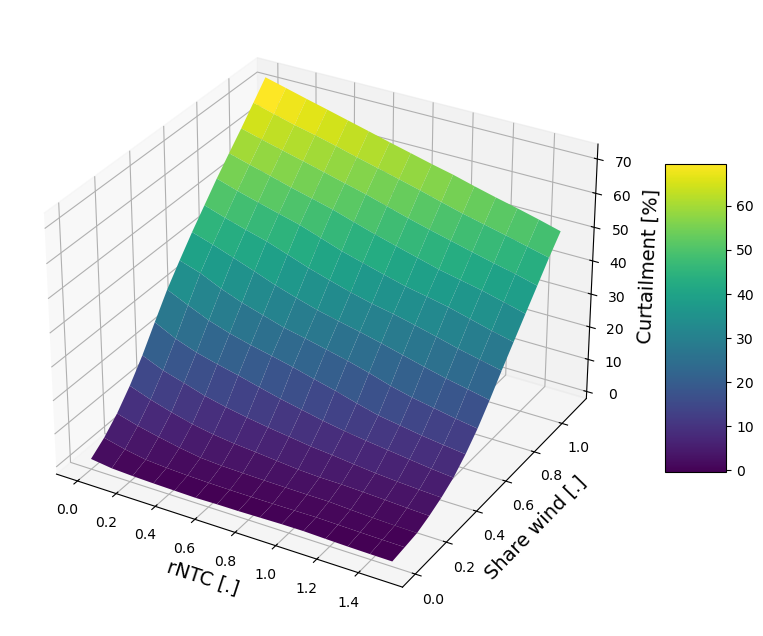

In [70]:
# NTC-Wind
x1_mesh, x2_mesh = np.meshgrid(x6v, x4v)
input_data = np.column_stack((CR_static, flex_static, sto_static, x2_mesh.flatten(), PV_static, x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x6, x4)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A,B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share wind [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

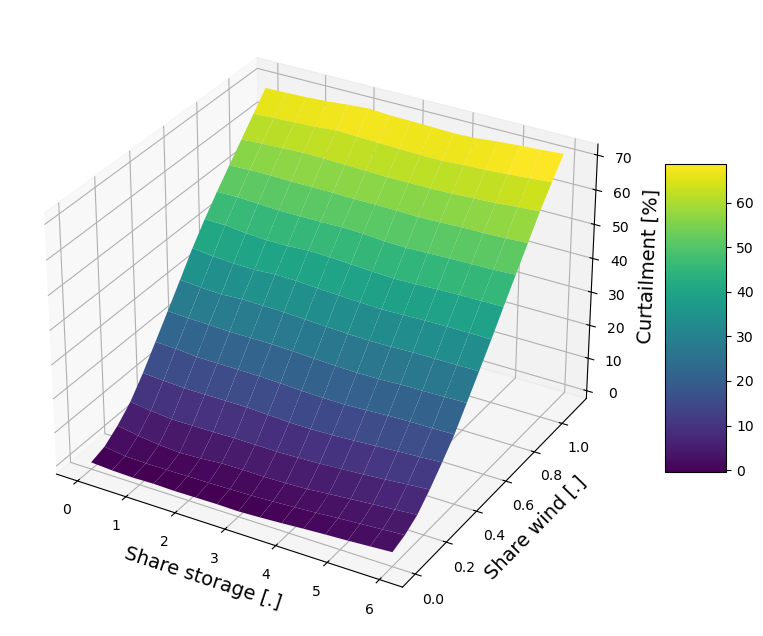

In [71]:
# sto wind
x1_mesh, x2_mesh = np.meshgrid(x3v, x4v)
input_data = np.column_stack((CR_static, flex_static, x1_mesh.flatten(), x2_mesh.flatten(), PV_static , NTC_static))


predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)


fig = plt.figure(figsize=(10, 8))
A, B = np.meshgrid(x3, x4)

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Share storage [.]', fontsize=14)
ax1.set_ylabel('Share wind [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

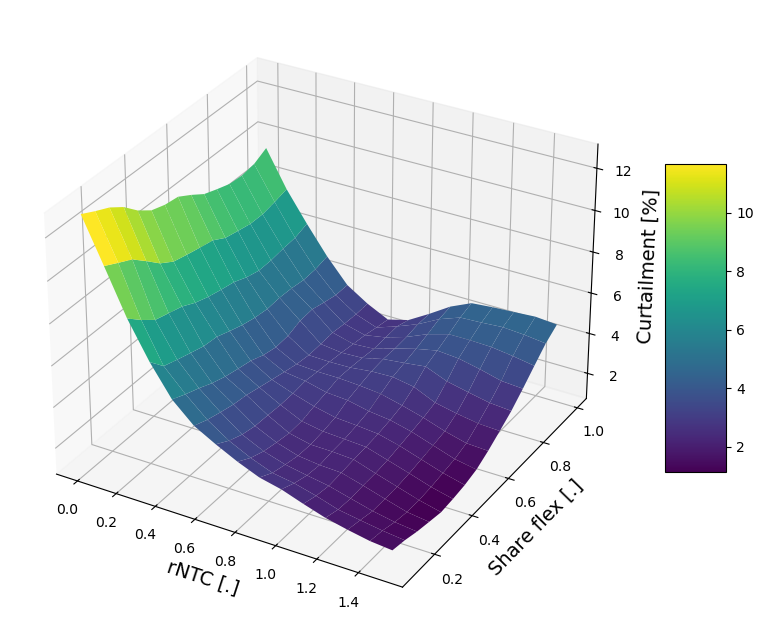

In [74]:
# Flex-rNTC 
x1_mesh, x2_mesh = np.meshgrid(x6v, x2v)


input_data = np.column_stack((CR_static, x2_mesh.flatten(), sto_static, wind_static, PV_static , x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x6, x2)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share flex [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

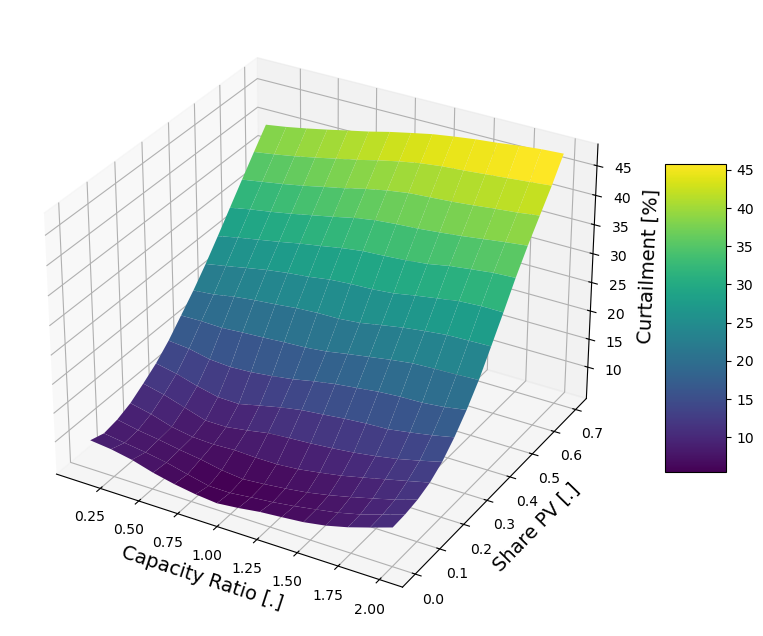

In [75]:
# CR-PV 
x1_mesh, x2_mesh = np.meshgrid(x1v, x5v)
input_data = np.column_stack((x1_mesh.flatten(), flex_static, sto_static , wind_static, x2_mesh.flatten() , NTC_static ))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x5)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('Share PV [.]',fontsize=14)
ax1.set_zlabel('Curtailment [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()